In [1]:
from astropy.io import fits
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt
import warnings

from astropy.wcs import WCS
import cv2
from glob import glob

warnings.filterwarnings("ignore")
plt.style.use('paper')

In [2]:
input_dir = '/Users/abarnes/Dropbox/work/Smallprojects/galaxies/scratch/jwst_pressreleaseimages/'
output_dir = './check_plots/'

libpng warning: iCCP: known incorrect sRGB profile


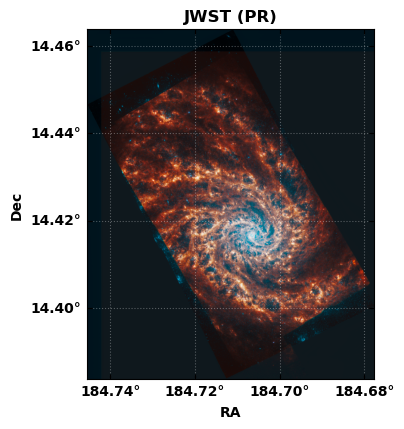

In [3]:
# Define the region show... 
l = 65.0028456
b = -54.9368264
width = 0.0289955
height = 0.0578610

gal = 'ngc4254'

hdu_file = f'{input_dir}/jwst_wcs/{gal}_nircam_lv3_f335m_i2d.fits'

## -- Uncomment the appropriate line below to select the image to display
png_file = f'{input_dir}/jwst_northUp/{gal}_northUp.png' #e.g. JWST only 
# png_file = f'{input_dir}/jwsthst_northUp/{gal}_jwsthst_northUp.png'#e.g. JWST and HST combined
# png_file = f'{input_dir}/hst_northUp/{gal}_hst_northUp.png'#e.g. HST only
## -- 

hdu = fits.open(hdu_file)[1]
img1 = cv2.imread(png_file, cv2.IMREAD_UNCHANGED)[::-1, :, ::-1]

fig = plt.figure(figsize=(10, 10))

ax1 = fig.add_subplot(221, projection=WCS(hdu.header))

ax1.imshow(img1, origin='lower')

ax1.set_title('JWST (PR)', weight='bold')

ax1.set_xlabel('RA')
ax1.set_ylabel('Dec')
ax1.grid(True, alpha=0.3, ls=':', color='white')

ra = ax1.coords['ra']
dec = ax1.coords['dec']

ra.set_major_formatter('d.dd')
dec.set_major_formatter('d.dd')

fig.savefig(f'{output_dir}/{gal}_single_hq.png', dpi=300)
fig.savefig(f'{output_dir}/{gal}_single.jpeg', dpi=200)

# plt.close('all')